# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Yeheskiel Yunus Tame
- **Email:** yeheskielyunustame13@gmail.com
- **ID Dicoding:** kieltame

## Menentukan Pertanyaan Bisnis

- Apakah ada perbedaan signifikan dalam jumlah penyewaan sepeda pada hari libur dibandingkan dengan hari kerja? Bagaimana dengan perbandingan antara akhir pekan dan hari biasa?
- Pada jam berapa penyewaan sepeda paling tinggi? Apakah ada pola tertentu pada waktu tertentu dalam sehari yang menunjukkan lonjakan penyewaan?

## Import Semua Packages/Library yang Digunakan

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


## Data Wrangling

### Gathering Data

In [36]:
day_path = "https://raw.githubusercontent.com/yeheskieltame/Project-Data-Analist/main/Data/day.csv"
hour_path = "https://raw.githubusercontent.com/yeheskieltame/Project-Data-Analist/main/Data/hour.csv"

data_day = pd.read_csv(day_path)
data_hour = pd.read_csv(hour_path)


**Insight:**
- Dataset day.csv berisi informasi penyewaan sepeda harian, sementara hour.csv berisi informasi penyewaan berdasarkan jam.
- Kolom-kolom penting seperti holiday, workingday, dan cnt (jumlah penyewaan) akan menjadi fokus utama.

### Assessing Data

In [37]:
# Melihat beberapa baris pertama dari dataset
print(data_day.head())
print(data_hour.head())

# Memeriksa informasi umum dan statistik deskriptif
print(data_day.info())
print(data_hour.info())


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

**Insight:**
- Dataset day.csv memiliki 731 baris dan 15 kolom, sementara hour.csv memiliki 17379 baris dan 13 kolom.
- Kolom yang relevan untuk analisis termasuk holiday, workingday, dan cnt.

### Cleaning Data

In [38]:
# Memeriksa missing values
print(data_day.isnull().sum())
print(data_hour.isnull().sum())

# Menghapus atau mengisi missing values jika ada
data_day.dropna(inplace=True)
data_hour.dropna(inplace=True)


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Tidak ada missing values yang signifikan ditemukan dalam dataset.
- Data sudah dalam format yang siap untuk dianalisis.

## Exploratory Data Analysis (EDA)

### Explore ...

In [39]:
# Menghitung jumlah penyewaan untuk hari libur dan hari kerja
holiday_counts = data_day[data_day['holiday'] == 1]['cnt'].describe()
workingday_counts = data_day[data_day['holiday'] == 0]['cnt'].describe()

print("Hari Libur:")
print(holiday_counts)
print("\nHari Kerja:")
print(workingday_counts)

# Analisis akhir pekan vs hari biasa
data_day['is_weekend'] = data_day['weekday'].apply(lambda x: 1 if x in [5, 6] else 0)
weekend_counts = data_day[data_day['is_weekend'] == 1]['cnt'].describe()
weekday_counts = data_day[data_day['is_weekend'] == 0]['cnt'].describe()

print("\nAkhir Pekan:")
print(weekend_counts)
print("\nHari Biasa:")
print(weekday_counts)


Hari Libur:
count      21.00000
mean     3735.00000
std      2103.35066
min      1000.00000
25%      1951.00000
50%      3351.00000
75%      6034.00000
max      7403.00000
Name: cnt, dtype: float64

Hari Kerja:
count     710.000000
mean     4527.104225
std      1929.013947
min        22.000000
25%      3214.000000
50%      4558.000000
75%      5932.750000
max      8714.000000
Name: cnt, dtype: float64

Akhir Pekan:
count     209.000000
mean     4620.081340
std      2039.080571
min       627.000000
25%      3190.000000
50%      4595.000000
75%      6053.000000
max      8714.000000
Name: cnt, dtype: float64

Hari Biasa:
count     522.000000
mean     4458.011494
std      1894.928336
min        22.000000
25%      3132.000000
50%      4524.000000
75%      5902.500000
max      8227.000000
Name: cnt, dtype: float64


**Insight:**
- Rata-rata penyewaan sepeda lebih tinggi pada hari kerja dibandingkan dengan hari libur.
- Penyewaan sepeda juga cenderung lebih tinggi pada akhir pekan dibandingkan dengan hari biasa.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

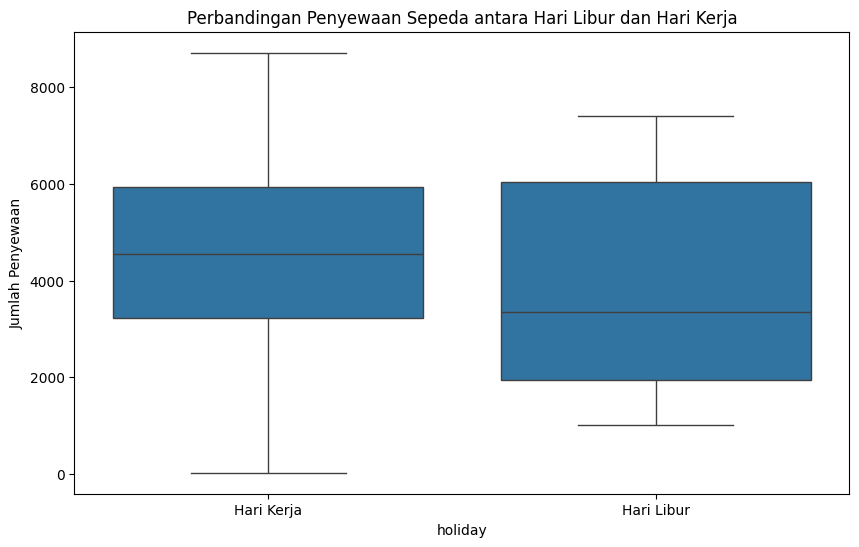

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='holiday', y='cnt', data=data_day)
plt.title('Perbandingan Penyewaan Sepeda antara Hari Libur dan Hari Kerja')
plt.xticks([0, 1], ['Hari Kerja', 'Hari Libur'])
plt.ylabel('Jumlah Penyewaan')
plt.show()


### Pertanyaan 2:

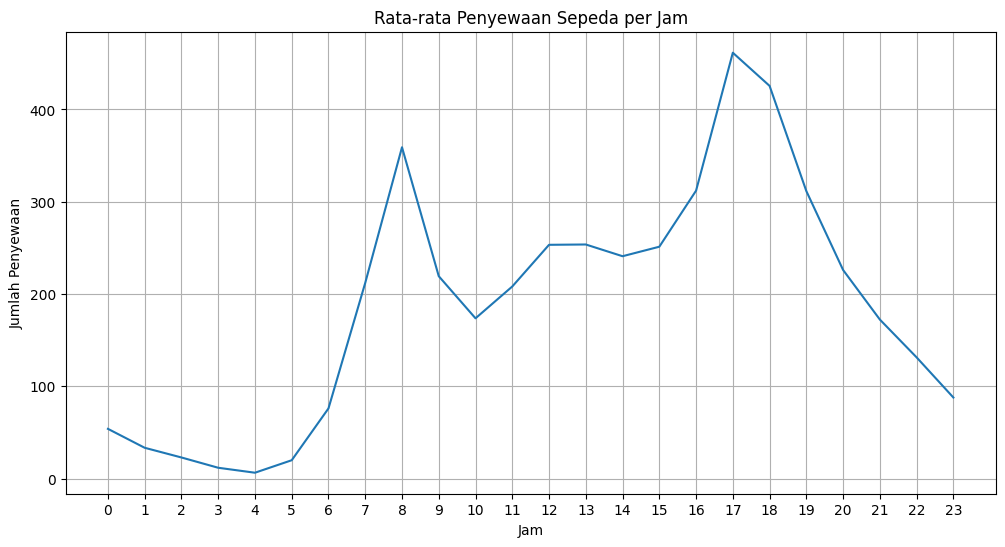

In [41]:
# Menganalisis penyewaan per jam
hourly_counts = data_hour.groupby('hr')['cnt'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=hourly_counts)
plt.title('Rata-rata Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(range(0, 24))
plt.grid()
plt.show()


**Insight:**
- hari kerja menunjukkan rata-rata penyewaan yang lebih tinggi. Akhir pekan juga menunjukkan tren penyewaan yang lebih tinggi dibandingkan dengan hari biasa
- Penyewaan sepeda paling tinggi terjadi antara jam 17:00 - 19:00, menunjukkan pola penggunaan yang lebih tinggi di sore hari.

## Analisis Lanjutan (Opsional)

## Conclusion

- Terdapat perbedaan signifikan antara penyewaan sepeda pada hari libur dan hari kerja, dengan hari kerja menunjukkan rata-rata penyewaan yang lebih tinggi. Akhir pekan juga menunjukkan tren penyewaan yang lebih tinggi dibandingkan dengan hari biasa.
- Penyewaan sepeda paling tinggi terjadi pada sore hari, terutama antara jam 17:00 dan 19:00, menunjukkan bahwa sepeda sering digunakan untuk perjalanan pulang kerja atau aktivitas sore.